<a href="https://colab.research.google.com/github/Nsarkar-XLR8/ML_Code/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 --->>> Generate or Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Generate synthetic data

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature (e.g., house size in 100 units)
y = 3 * X + np.random.randn(100, 1) * 2  # Target with some noise (e.g., house price)

Visualize the data

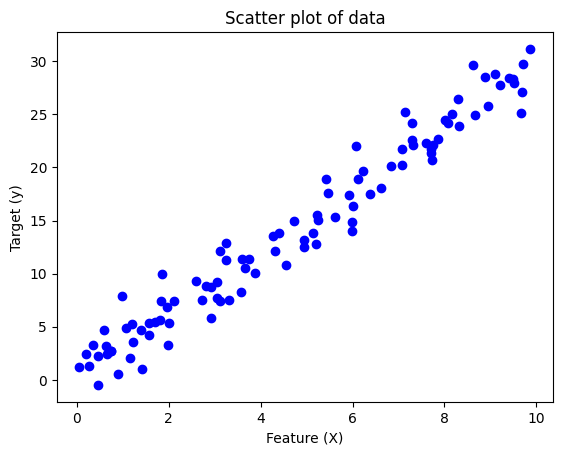

In [3]:
plt.scatter(X, y, color='blue')
plt.title("Scatter plot of data")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.show()

Step 2 --->>> Split Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3 --->>> Train the Model

In [5]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
print(f"Weight (m): {model.coef_[0][0]}")
print(f"Bias (b): {model.intercept_[0]}")


Weight (m): 2.9197294629921116
Bias (b): 0.28582663891712734


Step 4 --->>> Make Predictions

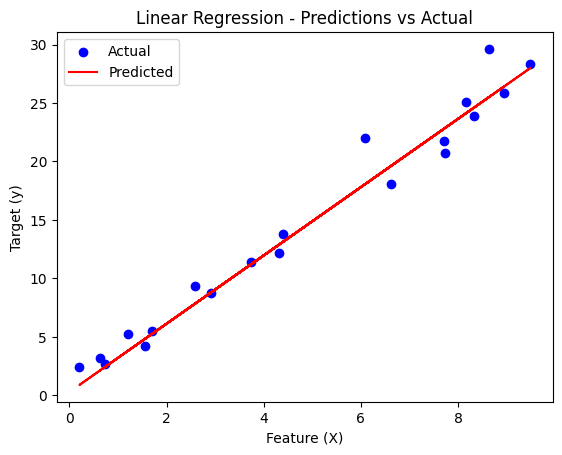

In [6]:
# Predict
y_pred = model.predict(X_test)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Linear Regression - Predictions vs Actual")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

Step 5 --->>> Evaluate the Model

In [7]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.614798054868012


Manual Implementation of Linear Regression with Gradient Descent

Epoch 0: Cost=276.2219, m=1.8358, b=0.2821
Epoch 100: Cost=3.2264, m=2.9066, b=0.4395
Epoch 200: Cost=3.2263, m=2.9072, b=0.4355
Epoch 300: Cost=3.2263, m=2.9076, b=0.4333
Epoch 400: Cost=3.2263, m=2.9078, b=0.4320
Epoch 500: Cost=3.2263, m=2.9079, b=0.4312
Epoch 600: Cost=3.2263, m=2.9080, b=0.4308
Epoch 700: Cost=3.2263, m=2.9080, b=0.4305
Epoch 800: Cost=3.2263, m=2.9080, b=0.4304
Epoch 900: Cost=3.2263, m=2.9080, b=0.4303
Final Slope (m): 2.9080356853402938
Final Intercept (b): 0.43025522558182794


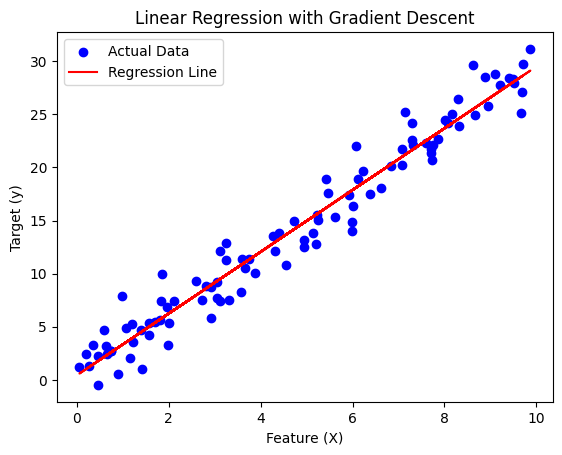

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature (e.g., house size)
y = 3 * X + np.random.randn(100, 1) * 2  # Target with noise

# Parameters
learning_rate = 0.01
epochs = 1000  # Number of iterations

# Initialize weights (m, b)
m = 0  # Slope
b = 0  # Intercept

# Number of data points
n = len(X)

# Gradient Descent
for epoch in range(epochs):
    # Predicted values
    y_pred = m * X + b

    # Calculate gradients
    dm = (-2 / n) * np.sum(X * (y - y_pred))  # Partial derivative w.r.t m
    db = (-2 / n) * np.sum(y - y_pred)       # Partial derivative w.r.t b

    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db

    # Optional: Print progress every 100 epochs
    if epoch % 100 == 0:
        cost = np.mean((y - y_pred) ** 2)
        print(f"Epoch {epoch}: Cost={cost:.4f}, m={m:.4f}, b={b:.4f}")

# Final parameters
print(f"Final Slope (m): {m}")
print(f"Final Intercept (b): {b}")

# Visualize the result
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.legend()
plt.title("Linear Regression with Gradient Descent")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.show()


In [9]:
dm = (-2 / n) * np.sum(X * (y - y_pred))
db = (-2 / n) * np.sum(y - y_pred)


In [10]:
m -= learning_rate * dm
b -= learning_rate * db


Code to Visualize the Cost Function

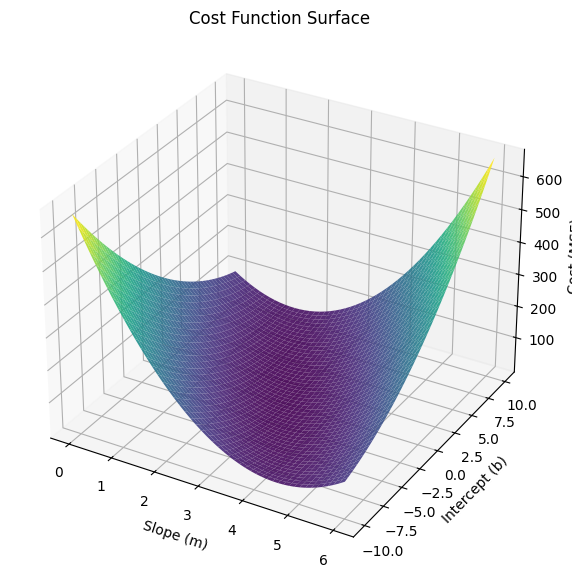

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature (e.g., house size)
y = 3 * X + np.random.randn(100, 1) * 2  # Target with noise

# Define a range of values for slope (m) and intercept (b)
m_values = np.linspace(0, 6, 50)  # Test slope values
b_values = np.linspace(-10, 10, 50)  # Test intercept values

# Initialize the cost matrix
cost_matrix = np.zeros((len(m_values), len(b_values)))

# Calculate the cost for each combination of m and b
for i, m in enumerate(m_values):
    for j, b in enumerate(b_values):
        # Predicted values based on current m and b
        y_pred = m * X + b

        # Mean Squared Error (cost function)
        cost_matrix[i, j] = np.mean((y - y_pred) ** 2)

# Create a 3D surface plot
m_grid, b_grid = np.meshgrid(m_values, b_values)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(m_grid, b_grid, cost_matrix.T, cmap='viridis', alpha=0.9)

# Labels and title
ax.set_title("Cost Function Surface")
ax.set_xlabel("Slope (m)")
ax.set_ylabel("Intercept (b)")
ax.set_zlabel("Cost (MSE)")

plt.show()
